In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime       #时间特征相关计算
import gc             #del某个变量后 通过gc.collect()收集垃圾释放系统内存

In [2]:
%%time
df_hist_trans = pd.read_csv('historical_transactions.csv',parse_dates=['purchase_date'])
df_new_trans = pd.read_csv('new_merchant_transactions.csv',parse_dates=['purchase_date'])

CPU times: user 1min 6s, sys: 3.94 s, total: 1min 10s
Wall time: 1min 10s


In [3]:
df_train = pd.read_csv('train.csv',parse_dates=['first_active_month'])
df_test = pd.read_csv('test.csv',parse_dates=['first_active_month'])

In [4]:
df_train.isna().sum()

first_active_month    0
card_id               0
feature_1             0
feature_2             0
feature_3             0
target                0
dtype: int64

In [5]:
df_train.nunique()

first_active_month        75
card_id               201917
feature_1                  5
feature_2                  3
feature_3                  2
target                197110
dtype: int64

---

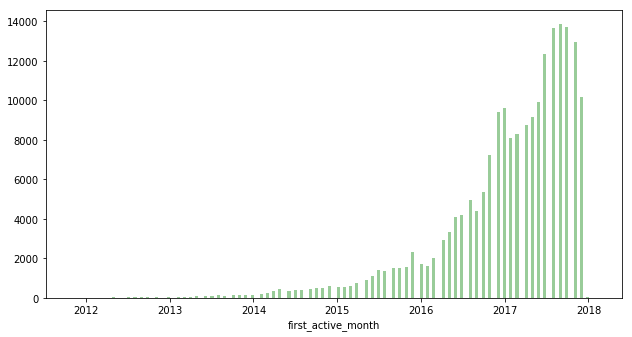

In [6]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_axes((0,0,1,1))
sns.distplot(df_train['first_active_month'], bins =170,kde=False,color='green')

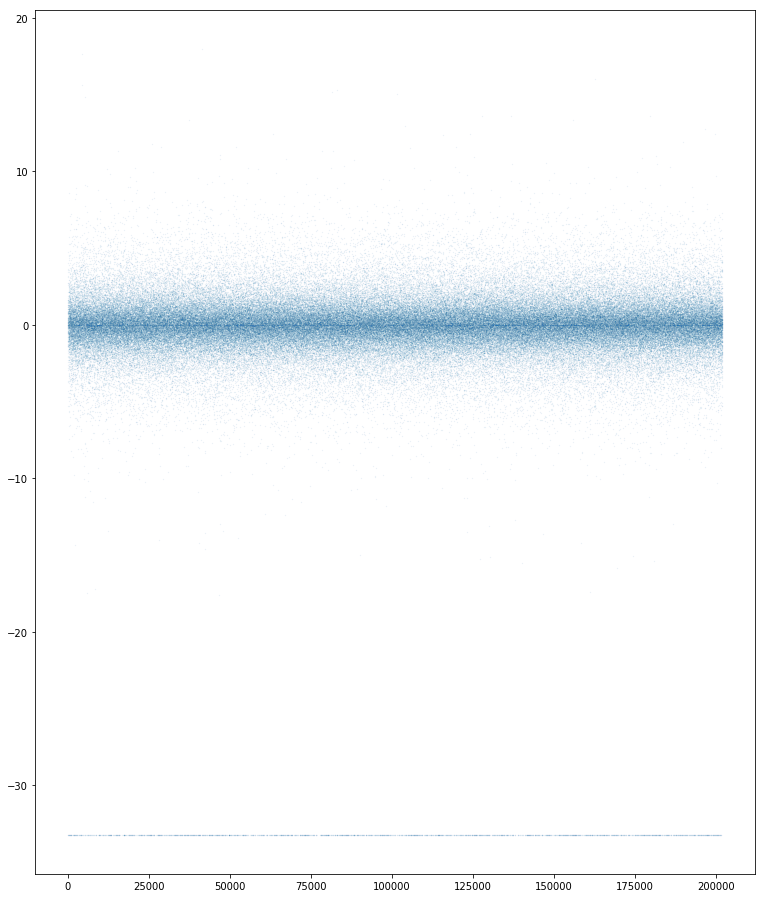

In [19]:
#target 顺序已经被打乱
fig = plt.figure(figsize=(10,12))
ax = fig.add_axes([0,0,1,1])
plt.scatter(x=range(len(df_train)),y=df_train.target,s=0.03,alpha=0.2)

---

In [7]:
df_merge_hist = pd.merge(df_hist_trans,df_train,how='left',on='card_id')

In [8]:
df_merge_hist = df_merge_hist[-df_merge_hist['target'].isna()]

In [9]:
df_merge_hist.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id,first_active_month,feature_1,feature_2,feature_3,target
400,N,C_ID_5037ff576e,322,N,1,B,278,M_ID_b61c7d1be0,-3,-0.595260,2017-09-07 20:57:19,3.0,11,37,2017-01-01,5.0,1.0,1.0,-2.352713
401,Y,C_ID_5037ff576e,138,N,1,B,307,M_ID_fe69229f24,-4,1.189469,2017-08-14 15:46:08,1.0,15,19,2017-01-01,5.0,1.0,1.0,-2.352713
402,Y,C_ID_5037ff576e,138,N,1,B,705,M_ID_efc106141c,-9,-0.640069,2017-03-05 14:57:51,1.0,15,33,2017-01-01,5.0,1.0,1.0,-2.352713
403,Y,C_ID_5037ff576e,226,N,1,B,307,M_ID_708022307c,-4,-0.652256,2017-08-15 10:45:28,1.0,16,19,2017-01-01,5.0,1.0,1.0,-2.352713
404,Y,C_ID_5037ff576e,330,N,1,B,705,M_ID_393b4b8cec,-9,-0.674210,2017-03-26 20:00:31,3.0,17,33,2017-01-01,5.0,1.0,1.0,-2.352713


In [10]:
df_merge_hist.isna().sum()/df_merge_hist.shape[0]

authorized_flag         0.000000
card_id                 0.000000
city_id                 0.000000
category_1              0.000000
installments            0.000000
category_3              0.006129
merchant_category_id    0.000000
merchant_id             0.004771
month_lag               0.000000
purchase_amount         0.000000
purchase_date           0.000000
category_2              0.090815
state_id                0.000000
subsector_id            0.000000
first_active_month      0.000000
feature_1               0.000000
feature_2               0.000000
feature_3               0.000000
target                  0.000000
dtype: float64

In [11]:
df_hist_trans.isna().sum()/df_hist_trans.shape[0]

authorized_flag         0.000000
card_id                 0.000000
city_id                 0.000000
category_1              0.000000
installments            0.000000
category_3              0.006120
merchant_category_id    0.000000
merchant_id             0.004757
month_lag               0.000000
purchase_amount         0.000000
purchase_date           0.000000
category_2              0.091125
state_id                0.000000
subsector_id            0.000000
dtype: float64

In [12]:
df_merge_hist['month_diff1'] = ((datetime.datetime.today() - df_merge_hist['purchase_date']).dt.days)//30
df_merge_hist['month_diff1'] += df_merge_hist['month_lag']

In [13]:
df_merge_hist['outliers'] = df_merge_hist['target']<=-30

In [14]:
df_merge_hist = df_merge_hist[df_merge_hist['outliers']==False]

In [15]:
df_merge_hist.head(30)

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,...,category_2,state_id,subsector_id,first_active_month,feature_1,feature_2,feature_3,target,month_diff1,outliers
400,N,C_ID_5037ff576e,322,N,1,B,278,M_ID_b61c7d1be0,-3,-0.595260,...,3.0,11,37,2017-01-01,5.0,1.0,1.0,-2.352713,13,False
401,Y,C_ID_5037ff576e,138,N,1,B,307,M_ID_fe69229f24,-4,1.189469,...,1.0,15,19,2017-01-01,5.0,1.0,1.0,-2.352713,13,False
402,Y,C_ID_5037ff576e,138,N,1,B,705,M_ID_efc106141c,-9,-0.640069,...,1.0,15,33,2017-01-01,5.0,1.0,1.0,-2.352713,14,False
403,Y,C_ID_5037ff576e,226,N,1,B,307,M_ID_708022307c,-4,-0.652256,...,1.0,16,19,2017-01-01,5.0,1.0,1.0,-2.352713,13,False
404,Y,C_ID_5037ff576e,330,N,1,B,705,M_ID_393b4b8cec,-9,-0.674210,...,3.0,17,33,2017-01-01,5.0,1.0,1.0,-2.352713,13,False
405,Y,C_ID_5037ff576e,138,N,1,B,307,M_ID_fe69229f24,-9,-0.671775,...,1.0,15,19,2017-01-01,5.0,1.0,1.0,-2.352713,13,False
406,Y,C_ID_5037ff576e,278,N,1,B,705,M_ID_d70b0fd11b,-6,-0.627477,...,5.0,5,33,2017-01-01,5.0,1.0,1.0,-2.352713,13,False
407,N,C_ID_5037ff576e,221,N,1,B,307,M_ID_16cf5cd707,-1,-0.658296,...,2.0,24,19,2017-01-01,5.0,1.0,1.0,-2.352713,13,False
408,Y,C_ID_5037ff576e,19,N,1,B,278,M_ID_6a5ddaaba7,-8,-0.696569,...,1.0,9,37,2017-01-01,5.0,1.0,1.0,-2.352713,13,False
409,Y,C_ID_5037ff576e,331,N,1,B,332,M_ID_46ab73a225,-2,-0.521510,...,1.0,16,2,2017-01-01,5.0,1.0,1.0,-2.352713,13,False


In [16]:
df_merge_hist.category_3.value_counts(dropna=False)

A      9498070
B      7116025
C      1125938
NaN     109871
Name: category_3, dtype: int64

In [49]:
df_merge_hist.category_2.value_counts(dropna=False)

 1.0    9417553
 3.0    2426416
 5.0    2295169
NaN     1637392
 4.0    1617762
 2.0     635717
Name: category_2, dtype: int64

In [50]:
df_merge_hist.category_1.value_counts(dropna=False)

N    16741908
Y     1288101
Name: category_1, dtype: int64

In [45]:
df_merge_hist.installments.value_counts(dropna=False)

 0      9552206
 1      7222525
 2       413526
 3       334193
 4       110663
-1       110513
 6        82319
 10       74064
 5        72111
 12       33980
 8        12841
 7         6884
 9         3558
 11         520
 999        106
Name: installments, dtype: int64

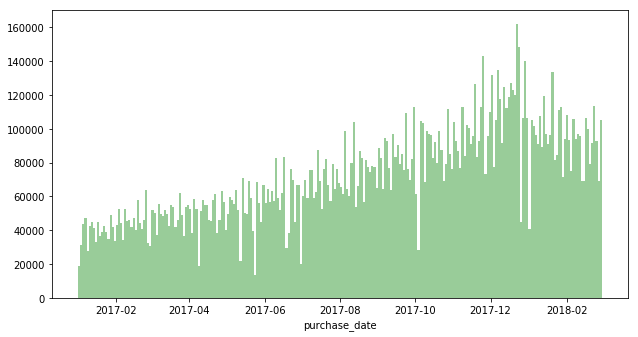

In [43]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_axes((0,0,1,1))
sns.distplot(df_merge_hist['purchase_date'], bins =250,kde=False,color='green')

In [17]:
from scipy import stats

In [18]:
df_month_diff1 = df_merge_hist[['target','month_diff1','card_id','outliers']].groupby('card_id').agg({'outliers':'mean','month_diff1':(lambda x: stats.mode(x)[0][0]),'target':'mean'})

In [19]:
df_month_diff1.reset_index(inplace=True)

In [20]:
df_month_diff1.head()

,card_id,month_diff1,outliers,target
0,C_ID_00007093c1,11,False,0.134077
1,C_ID_0001506ef0,11,False,0.884295
2,C_ID_000183fdda,11,False,-0.264433
3,C_ID_00027503e2,12,False,0.812872
4,C_ID_0002c7c2c1,12,False,1.288514


In [21]:
plt_data = df_month_diff1.groupby('month_diff1').target.mean()

In [22]:
plt_data = plt_data.reset_index()

In [27]:
plt_data

,month_diff1,target
0,11,0.049307
1,12,-0.093406
2,13,-0.149355
3,14,-0.537702
4,15,-0.488502
5,16,-0.026787
6,17,-0.070801
7,18,-0.317819
8,19,-0.341099
9,20,-0.234117


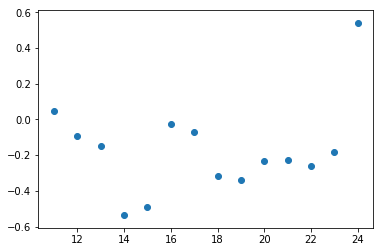

In [23]:
##without outliers
plt.scatter(x=plt_data.month_diff1,y=plt_data.target)

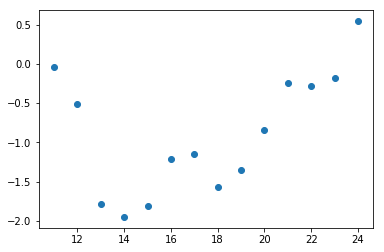

In [88]:
##with outliers
plt.scatter(x=plt_data.month_diff1,y=plt_data.target)

In [105]:
df_merge_hist.state_id.value_counts(dropna=False)/df_merge_hist.shape[0]

 9     0.363845
-1     0.090815
 16    0.073869
 15    0.071122
 5     0.056440
 19    0.041178
 20    0.038277
 22    0.032723
 21    0.032580
 4     0.029083
 11    0.022104
 13    0.021901
 7     0.021797
 3     0.018672
 18    0.013527
 12    0.013490
 2     0.012893
 1     0.008616
 10    0.007420
 24    0.007156
 23    0.006920
 14    0.006020
 8     0.005339
 17    0.003979
 6     0.000236
Name: state_id, dtype: float64

In [106]:
df_merge_hist.month_lag.value_counts(dropna=False)

-2     2389787
-1     2248468
 0     2151419
-3     1920958
-4     1635925
-5     1466671
-6     1271559
-7     1098685
-8      882416
-9      761224
-10     668862
-11     620200
-12     488207
-13     425628
Name: month_lag, dtype: int64

In [24]:
month_lag = df_merge_hist[['target','month_lag','card_id']].groupby('card_id').agg({'month_lag':(lambda x: stats.mode(x)[0][0]),'target':'mean'})

In [25]:
month_lag.reset_index(inplace=True)

In [26]:
month_lag.groupby('month_lag').target.mean()

month_lag
-13    0.155046
-12    0.091679
-11    0.029857
-10    0.039961
-9     0.024476
-8     0.055755
-7     0.066167
-6     0.047462
-5    -0.007139
-4     0.024361
-3     0.001315
-2    -0.028485
-1    -0.093651
 0    -0.210636
Name: target, dtype: float64

In [31]:
month_lag.month_lag.value_counts(dropna=False)

-2     36619
-1     29604
 0     27679
-3     21899
-4     16126
-5     14066
-6     11842
-7     10206
-8      6790
-9      5846
-11     5605
-10     5242
-13     4281
-12     3905
Name: month_lag, dtype: int64

In [28]:
plt_data_2 = month_lag.groupby('month_lag').target.mean()
plt_data_2 = plt_data_2.reset_index()

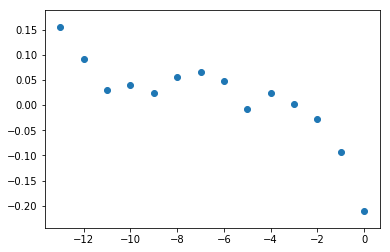

In [29]:
plt.scatter(x=plt_data_2.month_lag,y=plt_data_2.target)

In [35]:
pd.read_csv('score_dict_80_top_feature.csv',header=None).sort_values\
(by = 1,ascending=False)

,0,1
31,authorized_purchase_month_nunique,3.658425
53,new_purchase_date_ptp,3.655836
1,authorized_category_1_sum,3.654392
11,authorized_installments_std,3.654199
34,authorized_weekofyear_nunique,3.654157
14,authorized_merchant_id_nunique,3.654110
33,authorized_subsector_id_nunique,3.654106
62,unauthorized_installments_mean,3.654093
73,unauthorized_purchase_date_ptp,3.654071
28,authorized_purchase_date_min,3.654048
